In [1]:
import re
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import style, colors
# from matplotlib import gridspec
import matplotlib.gridspec as gridspec

matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

In [14]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/spliceosome_snvs.txt'
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/spliceosome_cnvs.txt'
f3 = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/spliceosome_fusions.txt'
f4 = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/patient_name_lib_id.txt'
df1 = pd.read_csv(f1, sep='\t',usecols=['gene', 'patient_ID','n_DNA_AF'])#, index_col=['patient_ID', 'gene']) 
df2 = pd.read_csv(f2, sep='\t', usecols=['patient', 'gene', 'cnv' ])#,  index_col=['patient', 'gene']) 
df3 = pd.read_csv(f3, sep='\t', usecols=['rna_lib', 'fusion_partner'])
df4 = pd.read_csv(f4, sep='\t', usecols=['patient', 'rna_lib'])


In [15]:
df1 = df1.drop_duplicates().set_index(['patient_ID', 'gene'])
df1.head()

,,n_DNA_AF
patient_ID,gene,
HTMCP-03-06-02007,SF3B1,0.0
HTMCP-03-06-02103,SF3B1,0.0
HTMCP-03-06-02026,SF3B1,0.0
HTMCP-03-06-02109,SF3B1,0.0
HTMCP-03-06-02447,SF3B1,0.0


In [16]:
df2 = df2.drop_duplicates().set_index(['patient', 'gene'])
df2.head(3)

,,cnv
patient,gene,
HTMCP-03-06-02003,SF1,3
HTMCP-03-06-02006,SF1,1
HTMCP-03-06-02020,SF1,3


In [17]:
df5 = pd.concat([df1, df2]).sort_index()
df5.head()

cnv  n_DNA_AF
patient_ID        gene                
HTMCP-03-06-02003 SF1    3.0       NaN
                  U2AF1  1.0       NaN
HTMCP-03-06-02006 SF1    1.0       NaN
                  U2AF1  1.0       NaN
                  U2AF2  3.0       NaN

In [18]:
df4.head(3)

,patient,rna_lib
0,HTMCP-03-06-02001,A37700
1,HTMCP-03-06-02002,A37701
2,HTMCP-03-06-02003,A37702


In [19]:
df3.head()

,rna_lib,fusion_partner
0,A57109,"IL4I1,U2AF1,translocation"
1,A57122,"SF1,EPG5,translocation"


In [20]:
df6 = pd.merge(df4, df3, left_on='rna_lib', right_on='rna_lib')
df6['gene'] = ['U2AF1', 'SF1']
df6 = df6.set_index(['patient', 'gene']).drop('rna_lib', axis=1)

# df6 = df6.set_index(['patient', 'gene'])
df6.head()


,,fusion_partner
patient,gene,
HTMCP-03-06-02157,U2AF1,"IL4I1,U2AF1,translocation"
HTMCP-03-06-02239,SF1,"SF1,EPG5,translocation"


In [21]:
df7 = pd.concat([df5, df6]).sort_index()

In [22]:
df7.head()

cnv fusion_partner  n_DNA_AF
patient_ID        gene                               
HTMCP-03-06-02003 SF1    3.0            NaN       NaN
                  U2AF1  1.0            NaN       NaN
HTMCP-03-06-02006 SF1    1.0            NaN       NaN
                  U2AF1  1.0            NaN       NaN
                  U2AF2  3.0            NaN       NaN

In [23]:
df7.index

MultiIndex(levels=[['HTMCP-03-06-02003', 'HTMCP-03-06-02006', 'HTMCP-03-06-02007', 'HTMCP-03-06-02012', 'HTMCP-03-06-02013', 'HTMCP-03-06-02020', 'HTMCP-03-06-02026', 'HTMCP-03-06-02037', 'HTMCP-03-06-02040', 'HTMCP-03-06-02046', 'HTMCP-03-06-02047', 'HTMCP-03-06-02061', 'HTMCP-03-06-02063', 'HTMCP-03-06-02068', 'HTMCP-03-06-02071', 'HTMCP-03-06-02074', 'HTMCP-03-06-02075', 'HTMCP-03-06-02076', 'HTMCP-03-06-02089', 'HTMCP-03-06-02092', 'HTMCP-03-06-02098', 'HTMCP-03-06-02099', 'HTMCP-03-06-02103', 'HTMCP-03-06-02108', 'HTMCP-03-06-02109', 'HTMCP-03-06-02110', 'HTMCP-03-06-02113', 'HTMCP-03-06-02120', 'HTMCP-03-06-02128', 'HTMCP-03-06-02145', 'HTMCP-03-06-02147', 'HTMCP-03-06-02148', 'HTMCP-03-06-02150', 'HTMCP-03-06-02151', 'HTMCP-03-06-02156', 'HTMCP-03-06-02157', 'HTMCP-03-06-02170', 'HTMCP-03-06-02174', 'HTMCP-03-06-02175', 'HTMCP-03-06-02176', 'HTMCP-03-06-02179', 'HTMCP-03-06-02182', 'HTMCP-03-06-02185', 'HTMCP-03-06-02194', 'HTMCP-03-06-02197', 'HTMCP-03-06-02202', 'HTMCP-03-06-0

In [24]:
df8 = df7.reset_index().set_index('gene').loc['SF3B1']
sf3b1_cnv_loss = df8[df8.cnv <2]['patient_ID'].tolist()

In [25]:
df7.reset_index().set_index('gene').loc['SF3B1'][['patient_ID','n_DNA_AF']].dropna()

,patient_ID,n_DNA_AF
gene,,
SF3B1,HTMCP-03-06-02007,0.00
SF3B1,HTMCP-03-06-02026,0.00
SF3B1,HTMCP-03-06-02103,0.00
SF3B1,HTMCP-03-06-02109,0.00
SF3B1,HTMCP-03-06-02219,0.00
SF3B1,HTMCP-03-06-02322,0.02
SF3B1,HTMCP-03-06-02447,0.00


In [ ]:
# HTMCP-03-06-02089
# HTMCP-03-06-02026
# HTMCP-03-06-02219
# HTMCP-03-06-02322
# HTMCP-03-06-02424
# HTMCP-03-06-02447
# HTMCP-03-06-02109
# HTMCP-03-06-02103
# HTMCP-03-06-02392
# HTMCP-03-06-02448
# HTMCP-03-06-02007

In [277]:
# {'HTMCP-03-06-02089',
#  'HTMCP-03-06-02392',
#  'HTMCP-03-06-02424',
#  'HTMCP-03-06-02448'}

,patient_ID,n_DNA_AF
gene,,
SF3B1,HTMCP-03-06-02007,0.00
ZRSR2,HTMCP-03-06-02007,0.00
ZRSR2,HTMCP-03-06-02012,0.56
SF3B1,HTMCP-03-06-02026,0.00
ZRSR2,HTMCP-03-06-02089,0.00
SF3B1,HTMCP-03-06-02103,0.00
U2AF1,HTMCP-03-06-02103,0.00
SF3B1,HTMCP-03-06-02109,0.00
SF1,HTMCP-03-06-02179,0.58


In [26]:
df8=  df7.reset_index().set_index('gene')[['patient_ID','n_DNA_AF']].dropna()
all_mut_pats = df8[df8.n_DNA_AF<0.05]['patient_ID'].tolist()

In [73]:
sf3b1_pats = df7.reset_index().set_index('gene').loc['SF3B1'][['patient_ID','n_DNA_AF']].dropna()['patient_ID'].tolist()

In [74]:
for a in sf3b1_pats:
    print(a)

HTMCP-03-06-02007
HTMCP-03-06-02026
HTMCP-03-06-02103
HTMCP-03-06-02109
HTMCP-03-06-02219
HTMCP-03-06-02322
HTMCP-03-06-02447


In [233]:
pats = list(set(sf3b1_cnv_loss + sf3b1_pats))

In [172]:
# sf3b1_pats = df7.reset_index().set_index('gene').loc['SF3B1']['patient_ID'].drop_duplicates().tolist()

In [183]:
df8 = df7.reset_index()
cnv_loss_pats = df8[df8.cnv <2].set_index('gene')['patient_ID'].drop_duplicates().tolist()
# .set_index('gene').loc['SF3B1']['patient_ID']

In [137]:
df7.unstack().head()

cnv                         fusion_partner              \
gene               SF1 SF3B1 U2AF1 U2AF2 ZRSR2            SF1 SF3B1 U2AF1   
patient_ID                                                                  
HTMCP-03-06-02003  3.0   NaN   1.0   NaN   NaN            NaN  None   NaN   
HTMCP-03-06-02006  1.0   NaN   1.0   3.0   NaN            NaN  None   NaN   
HTMCP-03-06-02007  NaN   NaN   NaN   NaN   NaN           None   NaN  None   
HTMCP-03-06-02012  NaN   NaN   NaN   NaN   NaN           None  None  None   
HTMCP-03-06-02013  NaN   NaN   3.0   4.0   NaN           None  None   NaN   

                              n_DNA_AF                          
gene              U2AF2 ZRSR2      SF1 SF3B1 U2AF1 U2AF2 ZRSR2  
patient_ID                                                      
HTMCP-03-06-02003  None  None      NaN   NaN   NaN   NaN   NaN  
HTMCP-03-06-02006   NaN  None      NaN   NaN   NaN   NaN   NaN  
HTMCP-03-06-02007  None   NaN      NaN   0.0   NaN   NaN  0.00  
HTMCP-03-06-02012  None   NaN      NaN   NaN   NaN   NaN  0.56  
HTMCP-03-06-02013   NaN  None      NaN   NaN   NaN   NaN   NaN

all patients which have either snv, fusion, or copy number change in at least one of the spliceosome genes, maybe i should exclude copy number gains since we consider changes that will disrupt the splicing

In [138]:
snv_pats = df7[['n_DNA_AF']].dropna().index.get_level_values(0).drop_duplicates().tolist()
cnv_pats = df7[['cnv']].dropna().index.get_level_values(0).drop_duplicates().tolist()
fusion_pats = df7[['fusion_partner']].dropna().index.get_level_values(0).drop_duplicates().tolist()

get splicing events

In [75]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/124_splicing_files.txt'
df = pd.read_csv(f, index_col=0,  sep='\t')#, names=(['lib', 'splicing_file']),header=None)
df.head()

,splicing_file
library,
A37700,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
A37701,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
A37702,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
A37704,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
A37705,/projects/NCI_validation2_assembly/NCI_SAIC_HI...


In [76]:
dfj = pd.DataFrame()
for index, row in df.iterrows():
    f = row.splicing_file
    dft = pd.read_csv(f, sep='\t', header=None)
    dft.set_index(0, inplace=True)
    dft.rename(columns={1:index}, inplace=True)
    if dfj.empty:
         dfj = dft
    else:
        dfj = dfj.join(dft, how='outer')
        
dfj.head(2)

,A37700,A37701,A37702,A37704,A37705,A37706,A37707,A37708,A37710,A37711,...,A78488,A78490,A78492,A78493,A78494,A78495,A78497,A78498,A78500,A78501
0,,,,,,,,,,,,,,,,,,,,,
AS3,1321,1106,1098,903,1278,945,1112,1055,1218,1034,...,473,601,405,626,253,458,400,470,447,451
AS5,2131,1623,1741,1683,2590,1652,1728,1624,1933,1798,...,876,1055,776,939,414,873,818,1020,949,896


In [77]:
dfj.loc['sum'] = dfj.sum()
dfj = dfj.T.sort_values('sum')
dfj.head(2)

,AS3,AS5,AS53,novel_exon,novel_intron,novel_utr,read-through,retained_intron,skipped_exon,sum
A52362,152.0,317.0,NaN,124.0,32.0,295.0,70.0,34.0,376.0,1400.0
A52343,195.0,390.0,1.0,216.0,56.0,361.0,61.0,7.0,344.0,1631.0


In [78]:
# get patient ids instead of rna library id
f4 = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/patient_name_lib_id.txt'
dfk = pd.read_csv(f4, sep='\t', index_col='patient', usecols=['patient', 'rna_lib'])
dfk = dfk['rna_lib'].reset_index()
dfk.head(2)

,patient,rna_lib
0,HTMCP-03-06-02001,A37700
1,HTMCP-03-06-02002,A37701


In [79]:
dfl = pd.merge(dfj, dfk, left_index=True, right_on='rna_lib', how='inner')
dfl.head(2)

,AS3,AS5,AS53,novel_exon,novel_intron,novel_utr,read-through,retained_intron,skipped_exon,sum,patient,rna_lib
56,152.0,317.0,NaN,124.0,32.0,295.0,70.0,34.0,376.0,1400.0,HTMCP-03-06-02203,A52362
45,195.0,390.0,1.0,216.0,56.0,361.0,61.0,7.0,344.0,1631.0,HTMCP-03-06-02149,A52343


In [80]:
dfl.shape

(124, 12)

In [81]:
dfl.set_index('patient', inplace=True)
dfl.drop('rna_lib', inplace=True, axis=1)
dfl.head(2)

,AS3,AS5,AS53,novel_exon,novel_intron,novel_utr,read-through,retained_intron,skipped_exon,sum
patient,,,,,,,,,,
HTMCP-03-06-02203,152.0,317.0,NaN,124.0,32.0,295.0,70.0,34.0,376.0,1400.0
HTMCP-03-06-02149,195.0,390.0,1.0,216.0,56.0,361.0,61.0,7.0,344.0,1631.0


In [82]:
dfl['read-through'].mean()

56.74193548387097

In [83]:
dfl.fillna(0, inplace=True)
dfl.loc['HTMCP-03-06-02026']

AS3                1034.0
AS5                1798.0
AS53                 10.0
novel_exon          857.0
novel_intron        179.0
novel_utr          1309.0
read-through         87.0
retained_intron     375.0
skipped_exon       2536.0
sum                8185.0
Name: HTMCP-03-06-02026, dtype: float64

In [84]:
dfm = dfl.copy()
for pat in sf3b1_pats:
    dfm.loc[pat, 'mut'] = 'mut'

dfm.fillna('wt', inplace=True)
print(dfm[dfm.mut=='mut'].shape)
print(dfm[dfm.mut=='wt'].shape)

(7, 11)
(117, 11)


In [85]:
value_cols = ['AS3',
 'AS5',
 'AS53',
 'novel_exon',
 'novel_intron',
 'novel_utr',
 'read-through',
 'retained_intron',
 'skipped_exon',
 'sum'
]

In [86]:
dfm.head()

,AS3,AS5,AS53,novel_exon,novel_intron,novel_utr,read-through,retained_intron,skipped_exon,sum,mut
patient,,,,,,,,,,,
HTMCP-03-06-02203,152.0,317.0,0.0,124.0,32.0,295.0,70.0,34.0,376.0,1400.0,wt
HTMCP-03-06-02149,195.0,390.0,1.0,216.0,56.0,361.0,61.0,7.0,344.0,1631.0,wt
HTMCP-03-06-02180,230.0,334.0,0.0,176.0,50.0,319.0,30.0,27.0,473.0,1639.0,wt
HTMCP-03-06-02195,266.0,390.0,2.0,216.0,52.0,279.0,34.0,85.0,339.0,1663.0,wt
HTMCP-03-06-02151,231.0,441.0,1.0,210.0,32.0,359.0,27.0,28.0,438.0,1767.0,wt


In [87]:
value_cols = [

 'AS53',

 'read-through',
'retained_intron'

]

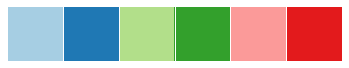

In [88]:
sns.palplot(sns.color_palette("Paired"))

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


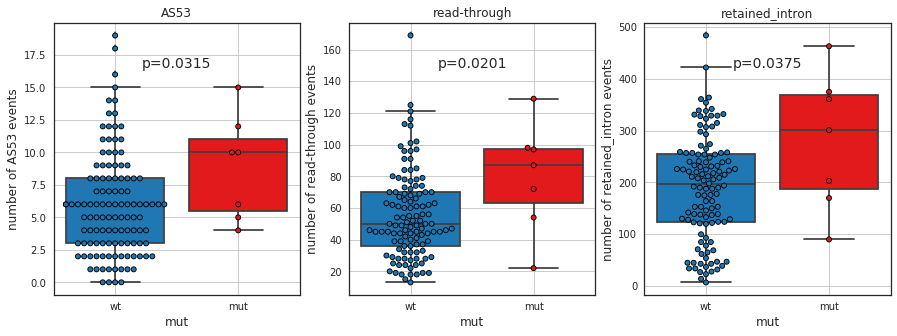

In [90]:
titles = value_cols
df = dfm.copy()
gene = 'SF3B1'
# boxplot overlaps individual data point
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(15,5))

    gs = gridspec.GridSpec(int(len(value_cols)/3.0), 3)
    group_col = 'mut'
    categories = sorted(df[group_col].unique().tolist(), reverse=True) 
#     customized colors
    clrs = sns.color_palette("Paired")
    muted = [clrs[i] for i in [1,5]]
    new_pal   = dict(wt = muted[0], mut = muted[1])
    p_values = {}
    for k, col in enumerate(value_cols):
#         print(k, col)
        ax = fig.add_subplot(gs[k])
#         ax.set_yscale("log")
        value_col = col
        sns.swarmplot(x="mut", y=col, data=df, edgecolor="black", linewidth=.9, palette=new_pal)
        sns.boxplot(x="mut", y=col, data=df, saturation=1, palette=new_pal, ax=ax)

        grps = {}
        # overlay actuall data point
        for i, cat in enumerate(categories):
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

        
        # statistical test for 1st grp
        sts, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
        p = round(p, 4)
        _ = ax.text(0.5, 0.85,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
#         ax.tick_params(axis='x', labelsize=18) #specify x tick label size
#         _ = ax.set_xticks(range(position+1))
#         _ = ax.set_xticklabels(categories, rotation=0)
        _ = ax.set_title('{}'.format(titles[k]), fontsize=12)
#         _ = ax.set_xlim(xmin=-0.5)
        _= ax.set_ylabel('number of {} events'.format(col), fontsize=12)
        ax.grid(True)

#     plt.suptitle('', fontsize=14)       
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/{}_splicing.png'.format(gene)
    plt.savefig(of, dpi=200)
plt.show()
plt.close()

In [293]:
for a in genes:
    print(a)

NameError: name 'genes' is not defined

In [288]:
for a in set(all_mut_pats):
    print(a)

HTMCP-03-06-02089
HTMCP-03-06-02026
HTMCP-03-06-02219
HTMCP-03-06-02322
HTMCP-03-06-02424
HTMCP-03-06-02447
HTMCP-03-06-02109
HTMCP-03-06-02103
HTMCP-03-06-02392
HTMCP-03-06-02448
HTMCP-03-06-02007


In [287]:
# HTMCP-03-06-02007
# HTMCP-03-06-02026
# HTMCP-03-06-02103
# HTMCP-03-06-02109
# HTMCP-03-06-02219
# HTMCP-03-06-02322
# HTMCP-03-06-02447

11

In [299]:
set(all_mut_pats) - set(sf3b1_pats)

{'HTMCP-03-06-02089',
 'HTMCP-03-06-02392',
 'HTMCP-03-06-02424',
 'HTMCP-03-06-02448'}

look at the genes

In [91]:
# f = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/splicing_files_with_spliceosomal_mutations.txt'
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/124_splicing_filtered_files.txt'
df = pd.read_csv(f, sep='\t')
df.head()

,library,splicing_file
0,A37700,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
1,A37701,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
2,A37702,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
3,A37704,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
4,A37705,/projects/NCI_validation2_assembly/NCI_SAIC_HI...


In [92]:
df11 = pd.DataFrame()
for index, row in df.iterrows():
    f = row.splicing_file
    patient = [i for i in f.split('/') if re.match( r'A\d{5}', i)][0]
#     print(patient)
    dft = pd.read_csv(f, sep='\t', usecols=['type', 'gene', 'spanning_reads']).sort_values('spanning_reads', ascending=False)
#     dft = dft.dropna()
    dft = dft[dft.spanning_reads != 'na']
    dft =  dft[dft.spanning_reads !='0,0']
    dft['patient'] = patient
    dft = dft.drop_duplicates()
#     dft.set_index(0, inplace=True)

#     dft.rename(columns={1:index}, inplace=True)
    if df11.empty:
         df11 = dft
    else:
        df11 = pd.concat([df11, dft])
        
# df11.head(2)
# print(df11)
df12 = df11[['gene', 'patient']].drop_duplicates()['gene'].value_counts()
df12
# df12[df12 > 1].to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/a_mut.tmp')

CLASP2           124
IMMT             124
GNAS             124
PCBP2            124
IST1             124
PDCD11           124
PLXNB2           124
CCDC9            123
MPRIP            123
TAF15            123
MYO19            123
UQCRC1           123
TARBP1           122
GDE1             122
PATL1            122
HSPA4            122
CASP8AP2         122
MOB2             122
HDAC5            122
PCNXL3           121
YEATS2           121
ZNF185           121
TPI1             121
BCAP31           121
RUNDC1           121
TLN1             121
RECQL4           120
AIG1             120
RPL18A           120
LMF2             120
                ... 
SLC8A1             1
MLKL;FA2H          1
C10orf2            1
GML                1
UNC79              1
PPP1R1A            1
dablo              1
CD300E             1
CTC-513N18.6       1
BVES               1
RND2               1
AC011322.1         1
F2                 1
IGHV3OR16-16       1
KCNQ2              1
gubee              1
spawdaw      

In [93]:
df11.head(2)

,type,gene,spanning_reads,patient
9051,novel_utr,SMIM11,"98,91",A37700
10994,skipped_exon,ATP5G2,98,A37700


In [96]:
genes = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/genes.txt', header=None)
agenes = genes[0].tolist()

In [101]:
adf = pd.DataFrame()
for a in agenes:
    df99 = df11[df11.gene == a]
#     print(df99)
    if adf.empty:
         adf = df99
    else:
        adf = pd.concat([adf, df99])
adf

,type,gene,spanning_reads,patient
1640,AS5,PAGR1,4,A37707
2458,AS5,PAGR1,4,A37734
3029,novel_utr,PAGR1,"2,0",A50336
1720,AS5,PAGR1,3,A52365
10557,novel_utr,HSPE1,"3,0",A37705
6942,novel_utr,HSPE1,"4,0",A37711
2815,novel_utr,HSPE1,"6,0",A52365
17878,skipped_exon,OGDHL,12,A37705
8990,skipped_exon,OGDHL,4,A37711
4221,skipped_exon,OGDHL,8,A78500


In [112]:
adf.groupby('gene').apply(lambda x: ','.join(list(set(x['type']))))

gene
C6orf211                 AS5,novel_utr
DNAL1       novel_intron,novel_utr,AS5
HSPE1                        novel_utr
OGDHL                     skipped_exon
PAGR1                    AS5,novel_utr
RAB2A          skipped_exon,novel_exon
dtype: object

In [368]:
df13 = df12.copy()
df13.head()

PCBP2     124
PLXNB2    124
PDCD11    124
GNAS      124
IMMT      124
Name: gene, dtype: int64

In [379]:
# df12.to_frame()
# df13.to_frame()
df14 = pd.merge(df12.to_frame(), df13.to_frame(), left_index=True, right_index=True)

In [380]:
df14.head()

,gene_x,gene_y
PPIB,15,113
CHPF2,15,110
LRRC42,15,107
HSPA4,15,122
AIG1,15,120


In [381]:
df14['rating'] = df14.gene_x/15.0 - (df14.gene_y - df14.gene_x)/(124.0-15.0)

In [388]:
df15 = df14.sort_values('rating', ascending=False)
df15['mut'] = df15.gene_x/15.0
df15['wt'] = (df15.gene_y - df14.gene_x)/(124.0-15.0)

In [396]:
df16 = df15[(df15.wt <0.0001) & (df15.mut>0.13)]

In [483]:
df16

,gene_x,gene_y,rating,mut,wt
PAGR1,4,4,0.266667,0.266667,0.0
CTC-281F24.1,3,3,0.200000,0.200000,0.0
HSPE1,3,3,0.200000,0.200000,0.0
OGDHL,3,3,0.200000,0.200000,0.0
DNAL1,3,3,0.200000,0.200000,0.0
RAB2A,3,3,0.200000,0.200000,0.0
C6orf211,3,3,0.200000,0.200000,0.0
MPL,2,2,0.133333,0.133333,0.0
SELM,2,2,0.133333,0.133333,0.0
snyswerby,2,2,0.133333,0.133333,0.0


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


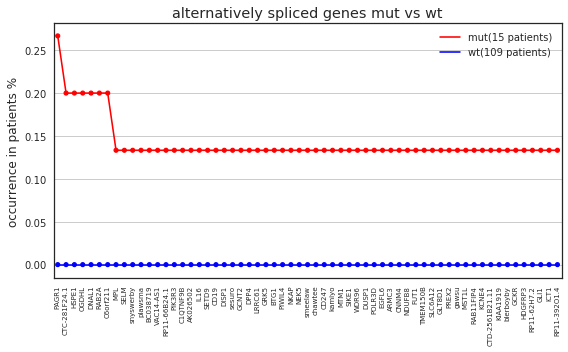

In [462]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(8,5))
#     ax = fig.add_subplot(111)
    ax = sns.pointplot(x=df16.index, y='mut', data=df16, scale=.5, color='red')
    sns.pointplot(x=df16.index, y='wt', data=df16, scale=.5, color='blue', ax=ax)
    _ = plt.setp(ax.get_xticklabels(), rotation=90, fontsize=7)
    _ = plt.title('alternatively spliced genes mut vs wt')
    _ = plt.xlabel('')
    _ = plt.ylabel('occurrence in patients %')
    ax.legend(handles=ax.lines[::len(df16)+1], labels=["mut(15 patients)","wt(109 patients)"])
of =f = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/alternatively_spliced_genes_mut_vs_wt.png'    
plt.tight_layout()
plt.savefig(of, box_inches='tight', dpi=200)

plt.show()
plt.close()

In [451]:
len(df16)

61

In [461]:
plt.tight_layout?

In [464]:
# df16

use exon/intron ratio to gauge splicing

In [49]:
f ='/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/exon_intron_ratio.txt'
df = pd.read_csv(f, sep='\t', index_col='genes')
df.head()

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
genes,,,,,,,,,,,,,,,,,,,,,
exon/intron_ratio_,1.151027e+01,1.124749e+01,8.362292e+00,8.687446e+00,5.593972e+00,4.348613e+00,7.581912e+00,7.538909e+00,1.000874e+01,5.302734e+00,...,1.115638e+01,6.595974e+00,1.091560e+01,1.134446e+01,1.977719e+01,1.547555e+01,9.279049e+00,1.378646e+01,1.603199e+01,1.373607e+01
total_fractional_reads_in_exons_,2.200543e+08,2.340579e+08,2.074503e+08,2.164302e+08,2.292516e+08,1.826140e+08,2.321660e+08,2.147828e+08,2.598114e+08,2.217383e+08,...,1.395949e+08,1.212065e+08,1.151532e+08,1.363101e+08,1.187321e+08,1.356514e+08,1.121676e+08,1.433328e+08,1.407311e+08,1.456215e+08
total_fractional_reads_in_introns_,1.911808e+07,2.080979e+07,2.480783e+07,2.491298e+07,4.098189e+07,4.199361e+07,3.062103e+07,2.848991e+07,2.595845e+07,4.181584e+07,...,1.251257e+07,1.837583e+07,1.054941e+07,1.201557e+07,6.003486e+06,8.765531e+06,1.208826e+07,1.039664e+07,8.778146e+06,1.060139e+07
total_fractional_reads_intergenic_,5.344467e+06,6.336832e+06,5.840106e+06,6.247759e+06,1.034689e+07,8.585403e+06,8.515021e+06,8.974241e+06,6.645801e+06,7.540577e+06,...,3.247519e+06,4.649758e+06,3.307723e+06,3.120855e+06,2.727382e+06,2.654315e+06,3.628402e+06,2.836753e+06,2.524933e+06,2.990280e+06
avg_cov_in_exons_,1.366205e+02,1.453146e+02,1.287953e+02,1.343704e+02,1.423306e+02,1.133757e+02,1.441400e+02,1.333477e+02,1.613036e+02,1.376660e+02,...,8.666736e+01,7.525093e+01,7.149272e+01,8.462798e+01,7.371468e+01,8.421904e+01,6.963913e+01,8.898804e+01,8.737278e+01,9.040895e+01


In [50]:
df2 = df.T

In [51]:
all_mut_pats = set(all_mut_pats)

In [52]:
dfm = df2.copy()
for pat in all_mut_pats:
    dfm.loc[pat, 'mut'] = 'mut'

dfm.fillna('wt', inplace=True)
print(dfm[dfm.mut=='mut'].shape)
print(dfm[dfm.mut=='wt'].shape)

(11, 17)
(113, 17)


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


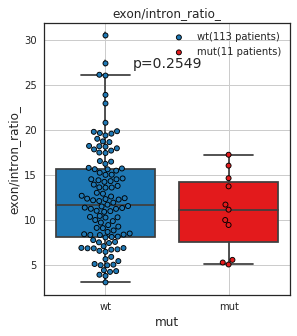

In [53]:
value_cols = ['exon/intron_ratio_']
titles = value_cols
df = dfm.copy()

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(15,5))

    gs = gridspec.GridSpec(int(len(value_cols)/3.0)+1, 3)
    group_col = 'mut'
    categories = sorted(df[group_col].unique().tolist(), reverse=True) 
    #     customized colors
    clrs = sns.color_palette("Paired")
    muted = [clrs[i] for i in [1,5]]
    new_pal   = dict(wt = muted[0], mut = muted[1])
    p_values = {}
    for k, col in enumerate(value_cols):
        ax = fig.add_subplot(gs[k])
        value_col = col
        sns.swarmplot(x="mut", y=col, data=df, edgecolor="black", linewidth=.9, palette=new_pal)
        ax.legend(labels=["wt(113 patients)", "mut(11 patients)"])
        sns.boxplot(x="mut", y=col, data=df, saturation=1, palette=new_pal, ax=ax)

        grps = {}
        # overlay actuall data point
        for i, cat in enumerate(categories):
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

        
        # statistical test for 1st grp
        sts, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
        p = round(p, 4)
        _ = ax.text(0.5, 0.85,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
        _ = ax.set_title('{}'.format(titles[k]), fontsize=12)
        ax.grid(True)
        

#     plt.suptitle('', fontsize=14)       
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/{}_splicing.png'.format('exon_intron_ratio')
    plt.savefig(of, dpi=200)
plt.show()
plt.close()

# splicing site mutations:
    

In [1]:
1276/44054

0.0289644527171199